# Week 5 Hand-in

## Class exercise 1


In [109]:
%pylab inline 
import pandas as pd
import numpy as np

data = np.array([['','Col1','Col2','col3'],['Row1',1,2,3],['Row2',4,5,6],['Row3',7,8,9]])

df = pd.DataFrame(data=data[1:4,1:4], columns=data[0,1:4], index=data[1:4,0])

#print('1', df['Col2'])
#print('2', df.iloc[:, 2])
#print('3', df.iloc[2, 1])
#print('4', df.head())




Populating the interactive namespace from numpy and matplotlib


In [110]:
# DF for all danes Married & Divorced 2008
df2008 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=1%2C2&ALDER=*&CIVILSTAND=G%2CF&Tid=2008K1',sep=';')
# SUB-DF totals for all danes Married & Divorced 2008
sub_df2008_total_country_and_gender = df2008.loc[(df2008['ALDER']=='I alt') & (df2008['OMRÅDE']=='Hele landet')]

#df2008.head()
#df2008.columns
#type(df2008)
#df2008.shape
#print(set(df2008['ALDER']))


In [111]:
# DF for all danes Married & Divorced 2020
df2020 = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=1%2C2&ALDER=*&CIVILSTAND=G%2CF&Tid=2020K4',sep=';')

# SUB-DF totals for all danes Married & Divorced 2020
sub_df2020_total_country_and_gender = df2020.loc[(df2020['ALDER']=='I alt') & (df2020['OMRÅDE']=='Hele landet')]

Divorced 22
Married -2
Divorced in 2008: 428864
Married in 2008: 2176977
Divorced in 2020: 552419
Married in 2020: 2138124


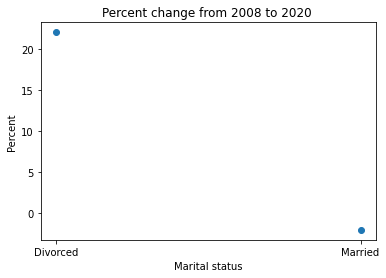

In [188]:
import matplotlib.pyplot as plt

def civilstand_total(sub_df :df, status :str):
    values = {}
    civilstand = sub_df.loc[sub_df['CIVILSTAND'] == status]
    sum = civilstand['INDHOLD'].sum()
    
    return sum

divorced_2008 = civilstand_total(sub_df2008_total_country_and_gender, 'Fraskilt')
married_2008 = civilstand_total(sub_df2008_total_country_and_gender, 'Gift/separeret')

divorced_2020 = civilstand_total(sub_df2020_total_country_and_gender, 'Fraskilt')
married_2020 = civilstand_total(sub_df2020_total_country_and_gender, 'Gift/separeret')

def percent_change():
    divorced = math.floor(((divorced_2020-divorced_2008)/divorced_2020)*100)
    married = math.floor(((married_2020-married_2008)/married_2020)*100)
    print('Divorced', divorced)
    print('Married', married)
    xpoints = (['Divorced', 'Married'])
    ypoints = ([divorced, married])
    plt.plot(xpoints, ypoints, 'o')
plt.xlabel("Marital status")
plt.ylabel("Percent")
plt.title("Percent change from 2008 to 2020 ")
percent_change()

print('Divorced in 2008:', divorced_2008)
print('Married in 2008:', married_2008)
print('Divorced in 2020:', divorced_2020)
print('Married in 2020:', married_2020)

